## Import the necessary  library 

In [ ]:
# Package imports
import numpy as np
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline

In [19]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)


## load the dataset 

In [4]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 
    N = int(m/2) 
    D = 2 
    X = np.zeros((m,D)) 
    Y = np.zeros((m,1), dtype='uint8') 
    a = 4 

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

In [6]:
X , Y = load_planar_dataset()
print(X.shape)

(2, 400)


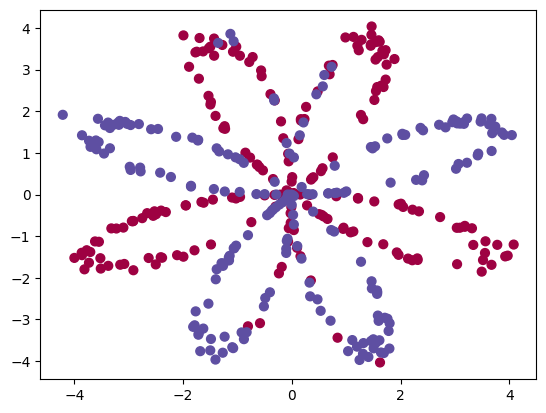

In [7]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [11]:

shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('Total no of training examples are  m = %d '% (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
Total no of training examples are  m = 400 


## Use Logistic Regression to predict the datasets

In [17]:
# Train the logistic regression classifier
smlr = sklearn.linear_model.LogisticRegressionCV();
smlr.fit(X.T,  Y.ravel());

Accuracy of logistic regression: 47% (percentage of correctly labelled datapoints)


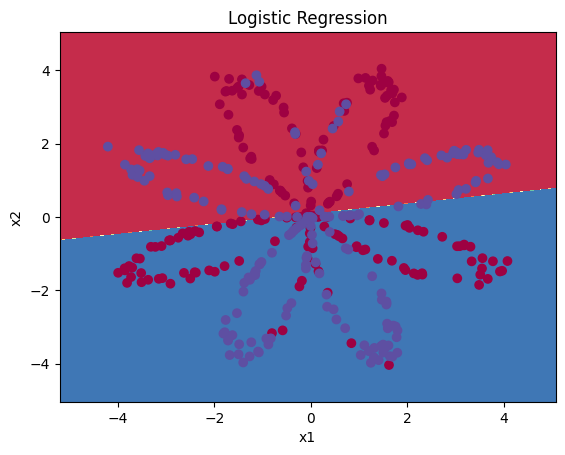

In [22]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: smlr.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = smlr.predict(X.T)
accuracy = np.mean(LR_predictions == Y.ravel()) * 100

print('Accuracy of logistic regression: %d%% (percentage of correctly labelled datapoints)' % accuracy)

<a id="neural-network-model"> </a>
## Neural Network Model


In [23]:

def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

In [25]:

(n_x, n_h, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))


The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


### Initialize the model's parameters

In [26]:
def initialize_parameters(n_x, n_h, n_y):

    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [28]:
np.random.seed(2)
parameters = initialize_parameters(n_x, n_h, n_y)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


### Forward Propagation

In [29]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [30]:
def forward_propagation(X, parameters):
    # Retrieve the parameters from the function "initialize_parameters" 
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Find the value of Z1,A1,Z2 and A2 
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [32]:
A2, cache = forward_propagation(X, parameters)
A2.shape

(1, 400)

In [34]:
print("A2 = " + str(A2))

A2 = [[0.4996522  0.50018609 0.50015804 0.50026729 0.49970121 0.5005812
  0.49971303 0.50010372 0.49973603 0.4997955  0.49969612 0.50046151
  0.49976668 0.49979938 0.49970855 0.49995075 0.49967577 0.49984969
  0.49962263 0.49966707 0.49979971 0.49978194 0.49973368 0.49969798
  0.49980326 0.49961478 0.49966447 0.4996782  0.49966797 0.49979401
  0.49964044 0.49966181 0.49963773 0.49961414 0.4996635  0.49979332
  0.49966683 0.49986857 0.50005043 0.49997581 0.49982684 0.49970772
  0.49974041 0.50003043 0.49994184 0.49980065 0.4999772  0.49995697
  0.49997984 0.50004785 0.50003125 0.49996095 0.49985395 0.49996735
  0.50000866 0.50004008 0.50001342 0.49999932 0.50003865 0.49998747
  0.5000019  0.49992616 0.50000181 0.50004517 0.49998844 0.50002838
  0.49990894 0.49989023 0.49994382 0.50001544 0.50000735 0.50002537
  0.49995746 0.49989714 0.49992011 0.49999798 0.49997054 0.49989845
  0.49990342 0.49990252 0.49992726 0.49991876 0.49989157 0.49989729
  0.49988873 0.49988984 0.49992793 0.4999063

## Compute the cost 

In [ ]:
def compute_cost(A2, Y):
    
    m = Y.shape[1] # number of examples
    logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),(1-Y))
    cost = -(np.sum(logprobs))/m
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    
    return cost

In [36]:
cost = compute_cost(A2, Y)
print("cost = " + str(compute_cost(A2, Y)))

cost = 0.6930480201239823


## Implement Backward Propagation 

In [38]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    # Retrive the value of W1 and W2 from the "parameters"  dictionary
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    #Retrive the value of A1 and A2 from the "cache" dictionary
    A1 = cache["A1"]
    A2 = cache["A2"]

    # Calculate the value of the derivatives 
    dZ2 = A2 - Y
    dW2 = (np.dot(dZ2,A1.T))/m
    db2 = (np.sum(dZ2,axis = 1, keepdims = True))/m
    dZ1 = np.multiply(np.dot(W2.T,dZ2),(1-np.power(A1,2)))
    dW1 = (np.dot(dZ1,X.T))/m
    db1 = (np.sum(dZ1,axis = 1, keepdims = True))/m
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [39]:
grads = backward_propagation(parameters, cache, X, Y)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00023606 -0.00207914]
 [ 0.0002091  -0.00178201]
 [-0.00012051  0.0010843 ]
 [-0.00051496  0.00449162]]
db1 = [[ 1.06848030e-07]
 [-9.70907252e-07]
 [-7.20012658e-08]
 [ 3.03048452e-07]]
dW2 = [[-1.75478714e-05  3.70240274e-03 -1.25686736e-03 -2.55725650e-03]]
db2 = [[-1.0892314e-05]]


## Update The parameters 

**General gradient descent rule**: $\theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

In [46]:
def update_parameters(parameters, grads, learning_rate = 1.2):

    # Retrieve each gradient from the dictionary "parameters"
    W1 = parameters["W1"] 
    b1 = parameters["b1"] 
    W2 = parameters["W2"] 
    b2 = parameters["b2"]
    # YOUR CODE ENDS HERE
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"] 
    db1 = grads["db1"] 
    dW2 = grads["dW2"] 
    db2 = grads["db2"] 
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [52]:
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 11.45698407  -3.41454986]
 [  0.15778794  -9.70368544]
 [ 11.49962561  13.45019806]
 [  9.25563234 -10.20523505]]
b1 = [[ 0.39372845]
 [-0.09954439]
 [ 0.03549286]
 [ 0.09104954]]
W2 = [[ -3.45786453 -11.99561659  -6.12530736  10.57185025]]
b2 = [[-0.05422408]]


## Predict the model 

In [53]:
def predict(parameters, X):
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2 , cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5).astype(int)
    
    return predictions

## Build the Neural Network model 

In [54]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
        A2 , cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y) 
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

### Test the model on Planer dataset 

In [ ]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary

plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [60]:
accuracy = np.mean((predictions == Y.ravel().astype(int))) * 100

# Print accuracy
print('Accuracy: %d%%' % accuracy)


Accuracy: 90%


### Model prediction for different size layers 

Accuracy for 3 hidden units: 90.75 %
Accuracy for 6 hidden units: 89.75 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 8 hidden units: 91.0 %


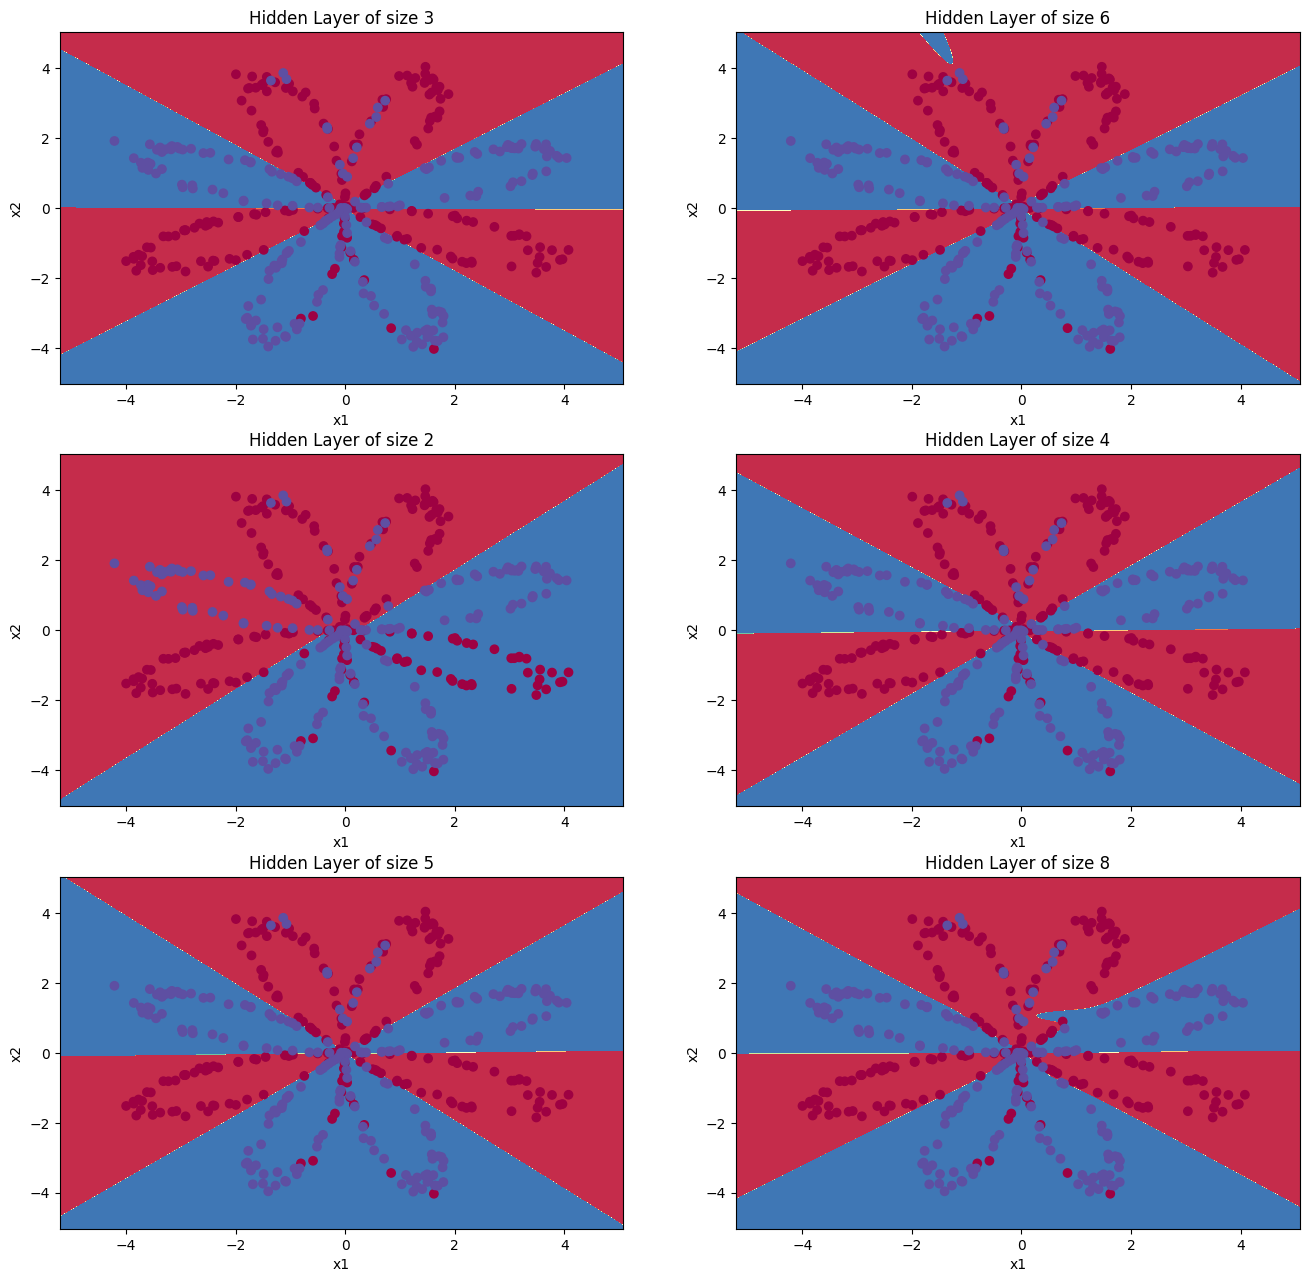

In [63]:

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [3, 6, 2, 4, 5, 8]
size = len(hidden_layer_sizes)

for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(size, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = np.mean((predictions == Y.ravel().astype(int))) * 100
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))